In [1]:
 
# Load libraries
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
inputfile="train.csv"
#if columns are not specified in dataset
#cols = ["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration","quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition","fraud"]
#df = pd.read_csv(inputfile, sep="|", header=None, names=cols)

dataset = pd.read_csv(inputfile, sep="|", header=0)
print(dataset.head(5))
#print(dataset.describe())
print(dataset.shape)

   trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  \
0           5                    1054       54.70              7   
1           3                     108       27.36              5   
2           3                    1516       62.16              3   
3           6                    1791       92.31              8   
4           5                     430       81.53              3   

   scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  \
0                         0                      3                   0.027514   
1                         2                      4                   0.129630   
2                        10                      5                   0.008575   
3                         4                      4                   0.016192   
4                         7                      2                   0.062791   

   valuePerSecond  lineItemVoidsPerPosition  fraud  
0        0.051898                  0.241379      0 

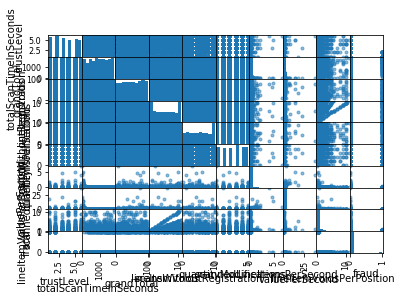

In [3]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [4]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(array)
print("X = ",X.shape)
print("Y = ",Y.shape)
print("X_train = ",X_train.shape)
print("Y_train = ",Y_train.shape)
print("X_validation = ",X_validation.shape)
print("Y_validation = ",Y_validation.shape)
print(X_train[0:5])

[[5.00000000e+00 1.05400000e+03 5.47000000e+01 ... 5.18975332e-02
  2.41379310e-01 0.00000000e+00]
 [3.00000000e+00 1.08000000e+02 2.73600000e+01 ... 2.53333333e-01
  3.57142857e-01 0.00000000e+00]
 [3.00000000e+00 1.51600000e+03 6.21600000e+01 ... 4.10026385e-02
  2.30769231e-01 0.00000000e+00]
 ...
 [4.00000000e+00 3.16000000e+02 4.18300000e+01 ... 1.32373418e-01
  1.66666667e-01 0.00000000e+00]
 [2.00000000e+00 6.85000000e+02 6.26800000e+01 ... 9.15036496e-02
  4.16666667e-02 0.00000000e+00]
 [4.00000000e+00 1.14000000e+03 3.80300000e+01 ... 3.33596491e-02
  1.05263158e-01 0.00000000e+00]]
X =  (1879, 9)
Y =  (1879,)
X_train =  (1503, 9)
Y_train =  (1503,)
X_validation =  (376, 9)
Y_validation =  (376,)
[[6.00000000e+00 7.32000000e+02 1.89300000e+01 0.00000000e+00
  1.00000000e+01 2.00000000e+00 1.77595628e-02 2.58606557e-02
  0.00000000e+00]
 [2.00000000e+00 9.87000000e+02 2.63200000e+01 6.00000000e+00
  5.00000000e+00 0.00000000e+00 2.63424519e-02 2.66666667e-02
  2.30769231e-01]


In [5]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [6]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=10)))
models.append(('ADA',AdaBoostClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.965386 (0.011502)
LDA: 0.948084 (0.015999)
KNN: 0.946093 (0.017475)
CART: 0.962728 (0.010861)
SVM: 0.947417 (0.016986)
RF: 0.964053 (0.009098)
ADA: 0.970702 (0.011270)


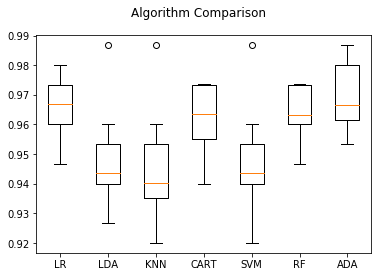

In [7]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [8]:
# listt = []
# for i in range(1, 501):
#     model = AdaBoostClassifier(n_estimators=i)
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_validation)
#     accuracy = accuracy_score(Y_validation, y_pred)
#     listt.append(accuracy)

# print(listt)

# import matplotlib.pyplot as plt
# plt.title("Accuracy Graph of Adaboost Classifier")
# plt.xlabel("n-estimators values")
# plt.ylabel("Accuracy_values")

# plt.plot(data, listt)
# plt.show()

The accuracy score at 1 is 0.9335106382978723
The accuracy score at 2 is 0.9335106382978723
The accuracy score at 3 is 0.9335106382978723
The accuracy score at 4 is 0.9414893617021277


In [9]:
# Make predictions on validation dataset
ada = AdaBoostClassifier(n_estimators=210)
ada.fit(X_train, Y_train)
predictions = ada.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9787234042553191
[[348   3]
 [  5  20]]
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       351
        1.0       0.87      0.80      0.83        25

avg / total       0.98      0.98      0.98       376




ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X, Y)
#predictions = ada.predict(X)

In [10]:
testset = pd.read_csv("test.csv", sep="|", header=0)
print(testset)
print("testset = ",testset.shape)
Y_pred = ada.predict(testset)
print(Y_pred)


       trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  \
0               4                     467       88.48              4   
1               3                    1004       58.99              7   
2               1                     162       14.00              4   
3               5                     532       84.79              9   
4               5                     890       42.16              4   
5               5                    1072       12.67              3   
6               3                     259       93.75              0   
7               2                    1528       47.35              2   
8               6                     816       80.89              9   
9               4                      16       31.91              7   
10              3                     714       94.29              8   
11              5                    1077       66.16              5   
12              4                    1301       84.35           

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
submission = pd.DataFrame({
        "fraud": Y_pred
    })
submission.to_csv('Coll_Shahandanchor_1.csv', index=False)
print('Exported')

In [ ]:
# dataa = pd.read_csv("C:\\Users\\kunal\\Downloads\\Coll_Shahandanchor_1\\DMC_2019_task\\train_t2c.csv", sep=",")
# real_xx=dataa.iloc[:,0:9].values
# real_yy=dataa.iloc[:,9].values
# y_predd=model.predict(real_xx)
# dataa['prediction['values']=y_predd

# dataa.to_csv("C:\\Users\\kunal\\Downloads\\Coll_Shahandanchor_1\\DMC_2019_task\\prediction.csv")
# accuracy_score(real_yy,y_predd,normalize=False)